# CREDIT CARD FRAUD DETECTION

CodSoft Data Science internship Task 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.duplicated().sum()

1081

In [11]:
data=data.drop_duplicates()

In [12]:
data.shape

(283726, 31)

In [13]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Fraud or Genuine')

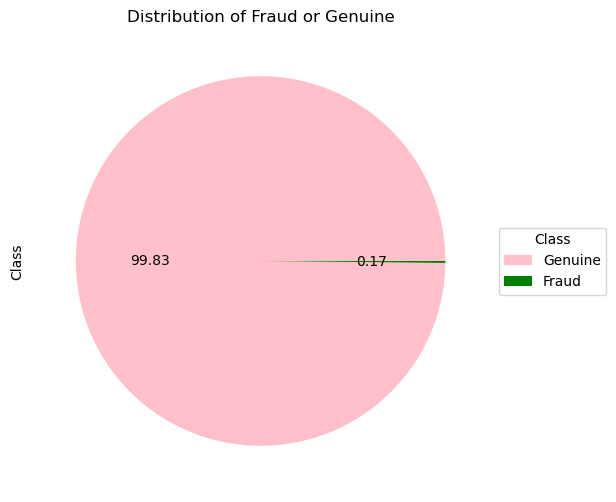

In [14]:
plt.figure(figsize=(6,6))
data['Class'].value_counts().plot(kind='pie',autopct='%.2f',labels=None,colors=['pink','g'])
plt.legend(['Genuine','Fraud'],title="Class",loc="center left",bbox_to_anchor=(1,0.5))
plt.title("Distribution of Fraud or Genuine")

In [15]:
data["Time_hr"]=data['Time']/3600
data['Time_hr'].tail()

284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_hr, dtype: float64

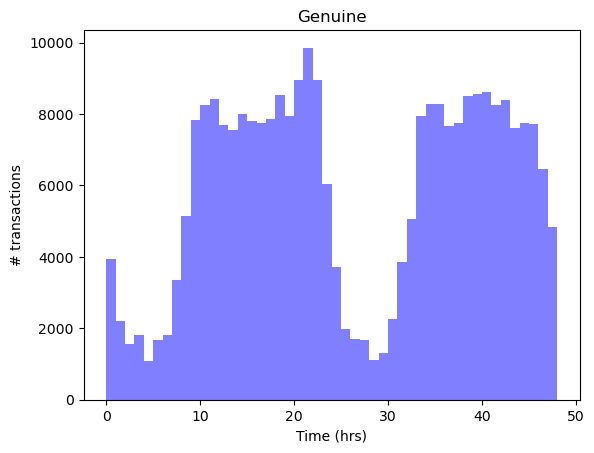

In [16]:
plt.hist(data.Time_hr[data.Class==0],bins=48,color='b',alpha=0.5)
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')
plt.title('Genuine')
plt.show()

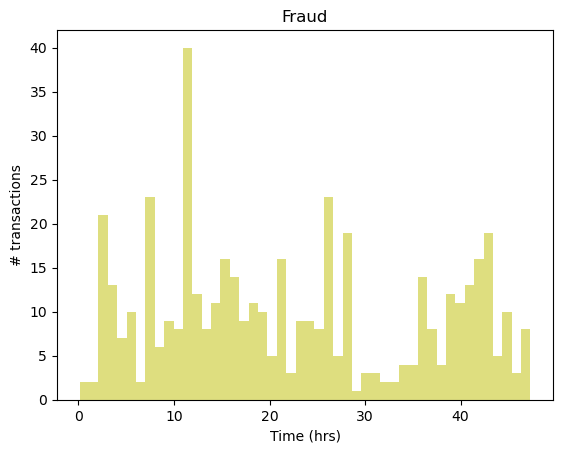

In [17]:
plt.hist(data.Time_hr[data.Class==1],bins=48,color='y',alpha=0.5)
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')
plt.title('Fraud')
plt.show()

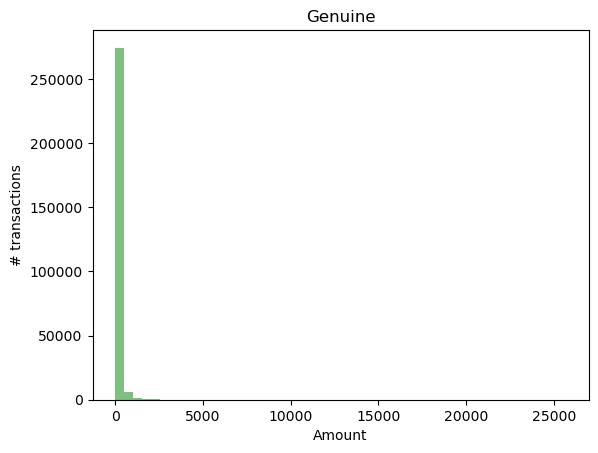

In [18]:
plt.hist(data.Amount[data.Class==0],bins=50,color='g',alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('# transactions')
plt.title('Genuine')
plt.show()

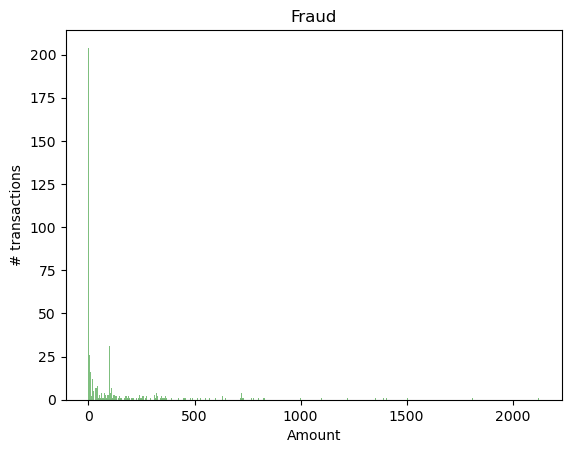

In [19]:
plt.hist(data.Amount[data.Class==1],bins=508,color='g',alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('# transactions')
plt.title('Fraud')
plt.show()

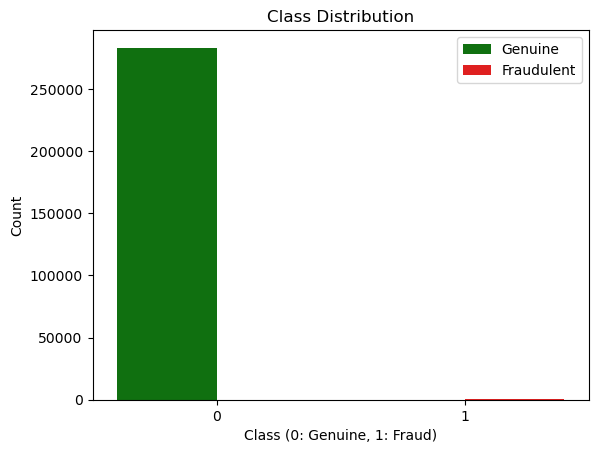

In [20]:
sns.countplot(data=data, x='Class', hue='Class', palette={0: 'g', 1: 'r'})
plt.title('Class Distribution')
plt.xlabel('Class (0: Genuine, 1: Fraud)')
plt.ylabel('Count')
plt.legend(['Genuine', 'Fraudulent'])
plt.show()

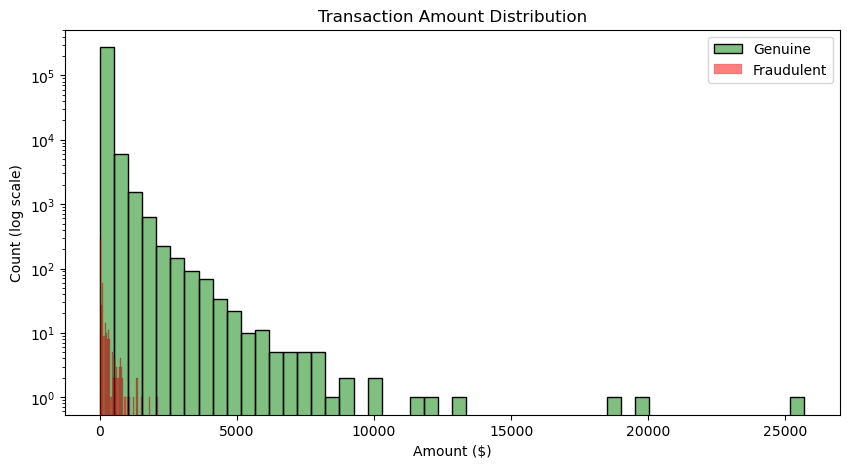

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(data[data['Class'] == 0]['Amount'], color='g', alpha=0.5, bins=50, label='Genuine')
sns.histplot(data[data['Class'] == 1]['Amount'], color='r', alpha=0.5, bins=50, label='Fraudulent')
plt.yscale('log')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Count (log scale)')
plt.legend()
plt.show()


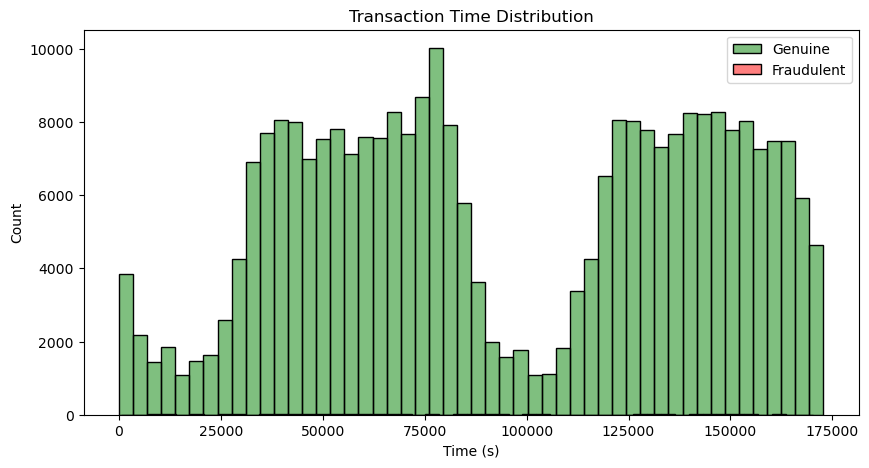

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(data[data['Class'] == 0]['Time'], color='g', alpha=0.5, bins=50, label='Genuine')
sns.histplot(data[data['Class'] == 1]['Time'], color='r', alpha=0.5, bins=50, label='Fraudulent')
plt.title('Transaction Time Distribution')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.legend()
plt.show()


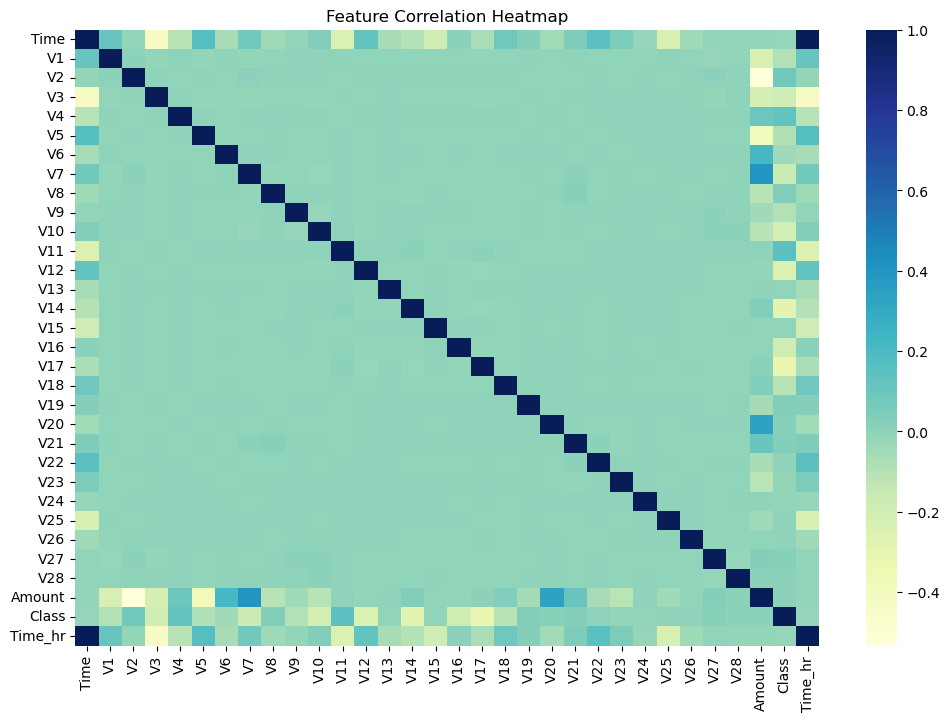

In [23]:
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix,  cmap="YlGnBu", annot = False)
plt.title('Feature Correlation Heatmap')
plt.show()


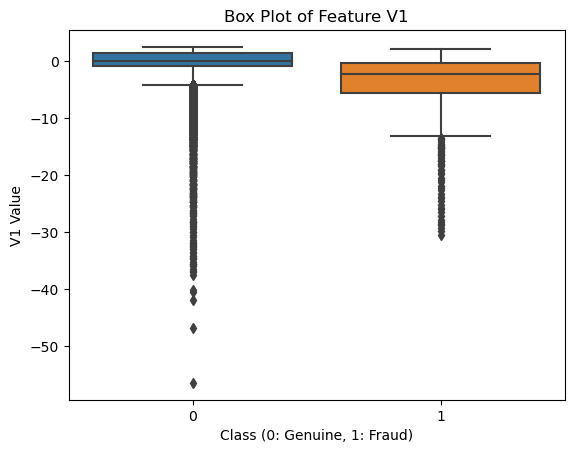

In [24]:
sns.boxplot(x='Class', y='V1', data=data)
plt.title('Box Plot of Feature V1')
plt.xlabel('Class (0: Genuine, 1: Fraud)')
plt.ylabel('V1 Value')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = data['Class']

In [27]:
X = data.drop(['Class'],axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

C:\Users\khali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.71      0.62      0.66        90

    accuracy                           1.00     56746
   macro avg       0.85      0.81      0.83     56746
weighted avg       1.00      1.00      1.00     56746



In [32]:
accuracy = accuracy_score(y_test, y_pred)
logistic_accuracy=accuracy * 100
logistic_accuracy

99.89955239135799

### Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
model2= GaussianNB()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [34]:
accuracy2 = accuracy_score(y_test, y_pred2)
NaiveBayes_accuracy=accuracy2 * 100
NaiveBayes_accuracy

99.28805554576535

In [35]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56656
           1       0.12      0.56      0.20        90

    accuracy                           0.99     56746
   macro avg       0.56      0.77      0.60     56746
weighted avg       1.00      0.99      1.00     56746



### K-Nearest Neighbours

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=10)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

In [37]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746



C:\Users\khali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\khali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
accuracy3 = accuracy_score(y_test, y_pred3)
KNeighborsClassifier_accuracy=accuracy3 * 100
KNeighborsClassifier_accuracy

99.8413985126705

In [39]:
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}%")
print(f"Naive Bayes Accuracy: {NaiveBayes_accuracy:.2f}%")
print(f"K-Nearest Neighbours Accuracy: {KNeighborsClassifier_accuracy:.2f}%")

Logistic Regression Accuracy: 99.90%
Naive Bayes Accuracy: 99.29%
K-Nearest Neighbours Accuracy: 99.84%


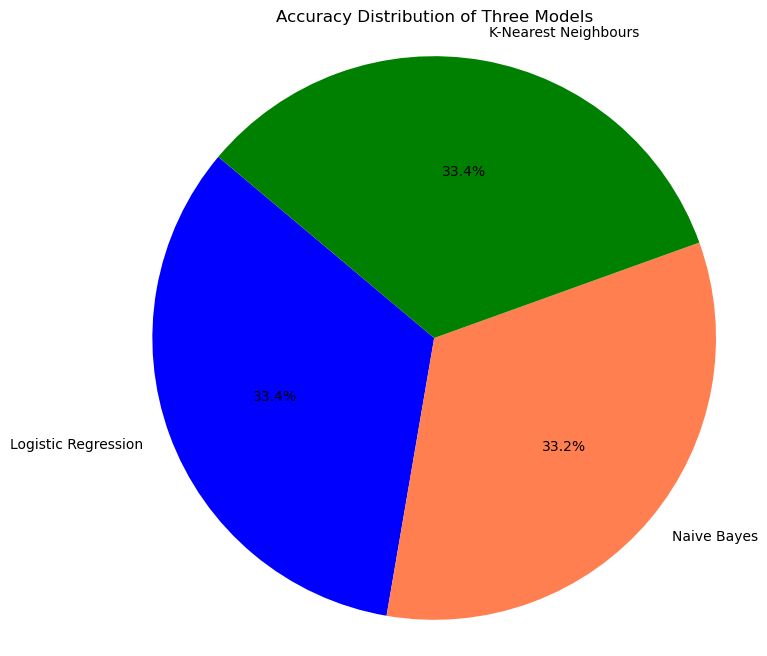

In [40]:
accuracies = [logistic_accuracy, NaiveBayes_accuracy, KNeighborsClassifier_accuracy]
model_names = ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbours"]
plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=model_names, autopct='%1.1f%%', startangle=140, colors=['blue', 'coral', 'green', 'salmon', 'steelblue'])
plt.title("Accuracy Distribution of Three Models")
plt.axis('equal') 
plt.show()

#### In our analysis, we found that Logistic Regression, Naive Bayes, and k-Nearest Neighbors achieved the same accuracy on our dataset. However, upon further examination, we observed differences in recall and precision scores among these algorithms. Given the importance of precision and recall in specific applications, the differing performance metrics indicate that Logistic Regression may be a preferable choice, as it offers a more favorable trade-off between precision and recall for our problem.

# Thankyou